# IMPORTS

In [1]:
# BASIC IMPORTS
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
import joblib
from sklearn.pipeline import Pipeline


# MODELLING
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ( RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier,
                                AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# PREPROCESSING
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# MODEL SELECETION
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# METRICS
from sklearn.metrics import classification_report
from sklearn.metrics import ( r2_score, mean_absolute_error, mean_squared_error,
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, precision_score, recall_score, f1_score, log_loss,
    matthews_corrcoef, cohen_kappa_score, accuracy_score, roc_curve, auc, 
)


`SUPRESSING SOME WARNING`

In [2]:
warnings.filterwarnings("ignore", message="Precision is ill-defined and being set to 0.0 in labels with no predicted samples.")
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore", message="Could not find the number of physical cores*", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message=".*loky.backend.context.*")
warnings.filterwarnings("ignore", category=UserWarning, module='joblib')
sys.stderr = open(os.devnull, 'w')


`DATASET: OBESITY ESTIMATION CLEANED`    

In [3]:
df = pd.read_csv('C:/Users/kabee/OneDrive/Desktop/DS_PROJECT/notebook/data/Obesity Estimation Cleaned.csv')

# INFO

In [4]:
df.head()

,Gender,Age,Height,Weight,FamOverweightHist,FreqHighCalFood,FreqVeg,MainMeals,FoodBtwMeals,Smoke,WaterIntake,CalorieMonitor,FreqPhyAct,TechUse,AlcoholConsump,Transport,Obesity,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public Transportation,Normal Weight,24.39
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public Transportation,Normal Weight,24.24
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public Transportation,Normal Weight,23.77
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight Level I,26.85
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public Transportation,Overweight Level II,28.34


In [5]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FamOverweightHist',
       'FreqHighCalFood', 'FreqVeg', 'MainMeals', 'FoodBtwMeals', 'Smoke',
       'WaterIntake', 'CalorieMonitor', 'FreqPhyAct', 'TechUse',
       'AlcoholConsump', 'Transport', 'Obesity', 'BMI'],
      dtype='object')

In [6]:
df.shape

(2111, 18)

`METADATA`

In [7]:
metadata = {
    "Gender"           :"Gender",
    "Age"              :"Age",
    "Height"           :"Height",
    "Weight"           :"Weight",
    "FamOverweightHist":"Has a family member suffered or suffers from overweight?",
    "FreqHighCalFood"  :"Do you eat high caloric food frequently?",
    "FreqVeg"          :"Do you usually eat vegetables in your meals?",
    "MainMeals"        :"How many main meals do you have daily?",
    "FoodBtwMeals"     :"Do you eat any food between meals?",
    "Smoke"            :"Do you smoke?",
    "WaterIntake"      :"How much water do you drink daily?",
    "CalorieMonitor"   :"Do you monitor the calories you eat daily?",
    "FreqPhyAct"       :"How often do you have physical activity?",
    "TechUse"          :"How much time do you use technological devices such as Cell Phone, T.V., computer Etc?",
    "AlcoholConsump"   :"How often do you drink alcohol?",
    "Transport"        :"Which transportation do you usually use?",
    "Obesity"          :"Obesity level",
    "BMI"              :"Body Mass Index"
}

metadata

{'Gender': 'Gender',
 'Age': 'Age',
 'Height': 'Height',
 'Weight': 'Weight',
 'FamOverweightHist': 'Has a family member suffered or suffers from overweight?',
 'FreqHighCalFood': 'Do you eat high caloric food frequently?',
 'FreqVeg': 'Do you usually eat vegetables in your meals?',
 'MainMeals': 'How many main meals do you have daily?',
 'FoodBtwMeals': 'Do you eat any food between meals?',
 'Smoke': 'Do you smoke?',
 'WaterIntake': 'How much water do you drink daily?',
 'CalorieMonitor': 'Do you monitor the calories you eat daily?',
 'FreqPhyAct': 'How often do you have physical activity?',
 'TechUse': 'How much time do you use technological devices such as Cell Phone, T.V., computer Etc?',
 'AlcoholConsump': 'How often do you drink alcohol?',
 'Transport': 'Which transportation do you usually use?',
 'Obesity': 'Obesity level',
 'BMI': 'Body Mass Index'}

`FEATURES`

In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

if len(numerical_features)>len(categorical_features):
    categorical_features.extend([None] * (len(numerical_features) - len(categorical_features)))
elif len(numerical_features)<len(categorical_features):
    numerical_features.extend([None] * (len(categorical_features) - len(numerical_features)))
else:
    features = pd.DataFrame({
    'Numerical': numerical_features,
    'Categorical': categorical_features
    })

features

,Numerical,Categorical
0,Age,Gender
1,Height,FamOverweightHist
2,Weight,FreqHighCalFood
3,FreqVeg,FoodBtwMeals
4,MainMeals,Smoke
5,WaterIntake,CalorieMonitor
6,FreqPhyAct,AlcoholConsump
7,TechUse,Transport
8,BMI,Obesity


`CATEGORICAL FEATURE VALUES`

In [9]:
cf_vals = pd.DataFrame({
    'Cat Feature': categorical_features,
    'Values': [df[feature].unique().tolist() for feature in categorical_features]
})
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)  

cf_vals

,Cat Feature,Values
0,Gender,"[Female, Male]"
1,FamOverweightHist,"[yes, no]"
2,FreqHighCalFood,"[no, yes]"
3,FoodBtwMeals,"[Sometimes, Frequently, Always, no]"
4,Smoke,"[no, yes]"
5,CalorieMonitor,"[no, yes]"
6,AlcoholConsump,"[no, Sometimes, Frequently, Always]"
7,Transport,"[Public Transportation, Walking, Automobile, Motorbike, Bike]"
8,Obesity,"[Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Insufficient Weight, Obesity Type II, Obesity Type III]"


`BINARY FEATURES`

In [10]:
def get_binary_features(cf_vals):
    binary_feats = []
    for i, row in cf_vals.iterrows():
        if len(row['Values']) == 2:
            binary_feats.append(row['Cat Feature'])
    return binary_feats

binary_features = get_binary_features(cf_vals)
binary_features

['Gender', 'FamOverweightHist', 'FreqHighCalFood', 'Smoke', 'CalorieMonitor']

`CORRELATIONS`

Cramér's V values with target variable sorted by strength of association:


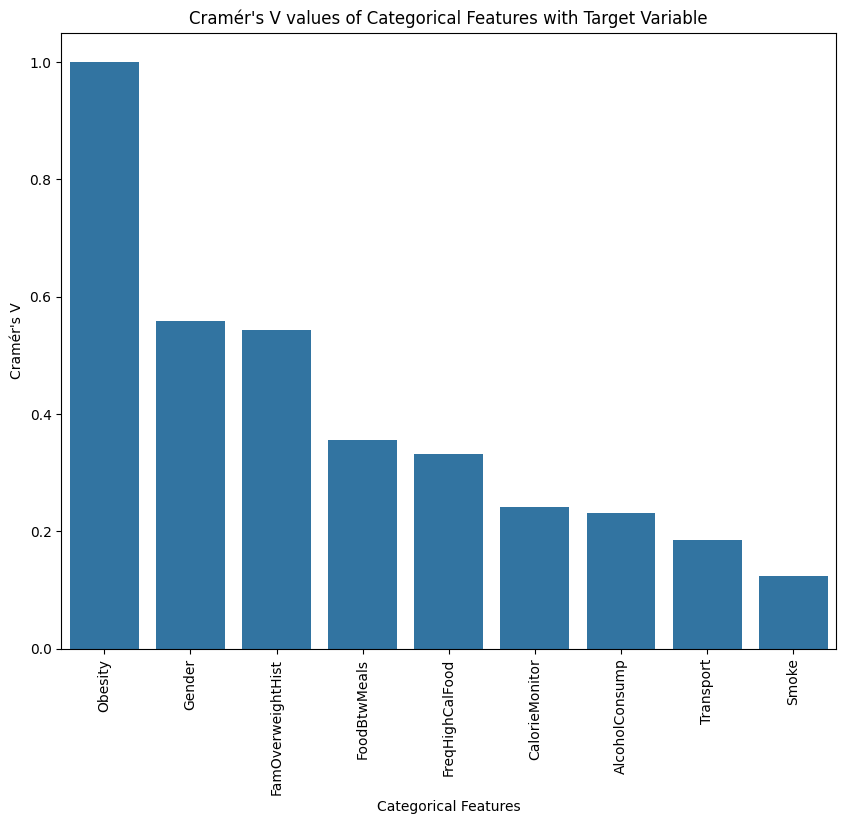

In [11]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Assuming df is your DataFrame
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
target_variable = 'Obesity'

# Calculate Cramér's V for each categorical feature with the target variable
cramers_v_values = {col: cramers_v(df[col], df[target_variable]) for col in categorical_features}

# Convert the dictionary to a DataFrame for better visualization
cramers_v_df = pd.DataFrame.from_dict(cramers_v_values, orient='index', columns=['Cramér\'s V'])
cramers_v_df.sort_values(by='Cramér\'s V', ascending=False, inplace=True)

# Print the sorted Cramér's V values
print("Cramér's V values with target variable sorted by strength of association:")
cramers_v_df

# Optionally visualize the results using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=cramers_v_df.index, y=cramers_v_df['Cramér\'s V'])
plt.title('Cramér\'s V values of Categorical Features with Target Variable')
plt.xlabel('Categorical Features')
plt.ylabel('Cramér\'s V')
plt.xticks(rotation=90)
plt.show()


# MODEL TRAINING

In [12]:
categorical_features = ['Gender', 'FamOverweightHist', 'FreqHighCalFood', 'FoodBtwMeals', 'Smoke', 'CalorieMonitor', 'AlcoholConsump', 'Transport']
numerical_features = ['Age', 'Height', 'Weight', 'FreqVeg', 'MainMeals', 'WaterIntake', 'FreqPhyAct', 'TechUse']

In [13]:
X = df.drop(columns=['Obesity', 'BMI'])
y = df['Obesity']

`ENCODING TARGET VARIABLE`

In [14]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.to_numpy())

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

`PREPROCESSING PIPELINE`

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

`DEFINING CLASSIFICATION MODELS`

In [17]:
Model_cls = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), 
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
}

In [18]:
results = []
best_model_name = None
best_model_obj = None
best_accuracy_score = -float('inf')

In [19]:
for model_name, model in Model_cls.items():
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

    result = {
        "Model": model_name,
        "Accuracy": accuracy,          #ACURRACY
        "Precision": precision,        #PRECISION
        "Recall": recall,              #RECALL
        "F1 Score": f1,                #F1 SCORE
        "ROC-AUC": roc_auc,            #ROC-AUC
    }
    
    results.append(result)

    if accuracy > best_accuracy_score:
        best_accuracy_score = accuracy
        best_model_name = model_name
        best_model_obj = clf  

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print(f"BEST MODEL IS: {best_model_name}\n")
results_df


BEST MODEL IS: CatBoost Classifier



,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
5,CatBoost Classifier,0.969267,0.969271,0.969267,0.969174,0.999139
4,XGBClassifier,0.964539,0.965353,0.964539,0.964356,0.998748
3,Random Forest Classifier,0.943262,0.944278,0.943262,0.943602,0.994454
2,Decision Tree,0.938534,0.938676,0.938534,0.938373,0.964126
7,Gradient Boosting Classifier,0.936170,0.937251,0.936170,0.935994,0.997515
0,Logistic Regression,0.869976,0.874990,0.869976,0.867120,0.988407
1,K-Neighbors Classifier,0.808511,0.803806,0.808511,0.797024,0.946807
6,AdaBoost Classifier,0.295508,0.298633,0.295508,0.210061,0.736582


In [20]:
best_model_obj

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FreqVeg', 'MainMeals',
                                                   'WaterIntake', 'FreqPhyAct',
                                                   'TechUse']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'FamOverweightHist',
                                                   'FreqHighCalFood',
                                                   'FoodBtwMeals', 'Smoke',
                                                   'CalorieMonitor',
                                                   'AlcoholConsump',
                                                   'Transport'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001FD418E7670>)])

In [21]:
y_pred = best_model_obj.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# TESTING

In [22]:
new_data = pd.DataFrame({
    'Age': [85],
    'Height': [2.85],
    'Weight': [100],
    'FreqVeg': [1],
    'MainMeals': [2],
    'WaterIntake': [1],
    'FreqPhyAct': [2],
    'TechUse': [4],
    'Gender': ['Female'],
    'FamOverweightHist': ['yes'],
    'FreqHighCalFood': ['yes'],
    'FoodBtwMeals': ['Sometimes'],
    'Smoke': ['yes'],
    'CalorieMonitor': ['no'],
    'AlcoholConsump': ['Frequently'],
    'Transport': ['Public Transportation'],

})


In [23]:
new_predictions = best_model_obj.predict(new_data)
predicted_labels = label_encoder.inverse_transform(new_predictions)

print("Predicted Obesity Levels:", predicted_labels[0])


Predicted Obesity Levels: Overweight Level II


# EVALUATION METRICS

`CLASSIFICATION REPORT FOR BEST MODEL`

In [24]:
print(f"BEST MODEL FOR GENERAL CLASSIFICATION: {best_model_name} \nACCURACY = {(accuracy*100):.4f}%\n") 
print("   --------------| CLASSIFICATION REPORT |----------------\n")
report = classification_report(y_test, y_pred)
print(report)


BEST MODEL FOR GENERAL CLASSIFICATION: CatBoost Classifier 
ACCURACY = 96.9267%

   --------------| CLASSIFICATION REPORT |----------------

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       0.95      0.94      0.94        62
           2       0.96      0.99      0.97        78
           3       0.98      0.98      0.98        58
           4       1.00      1.00      1.00        63
           5       0.93      0.93      0.93        56
           6       0.98      0.94      0.96        50

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



`CONFUSION MATRIX FOR BEST MODEL`

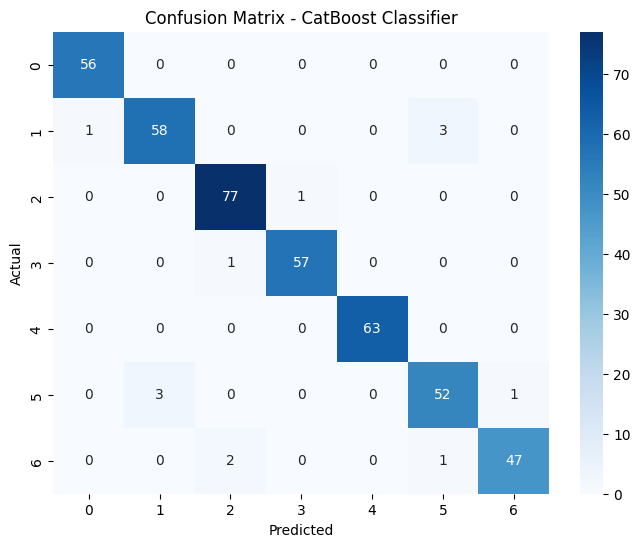

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()
print("\n")

`FEATURE IMPORTANCE`

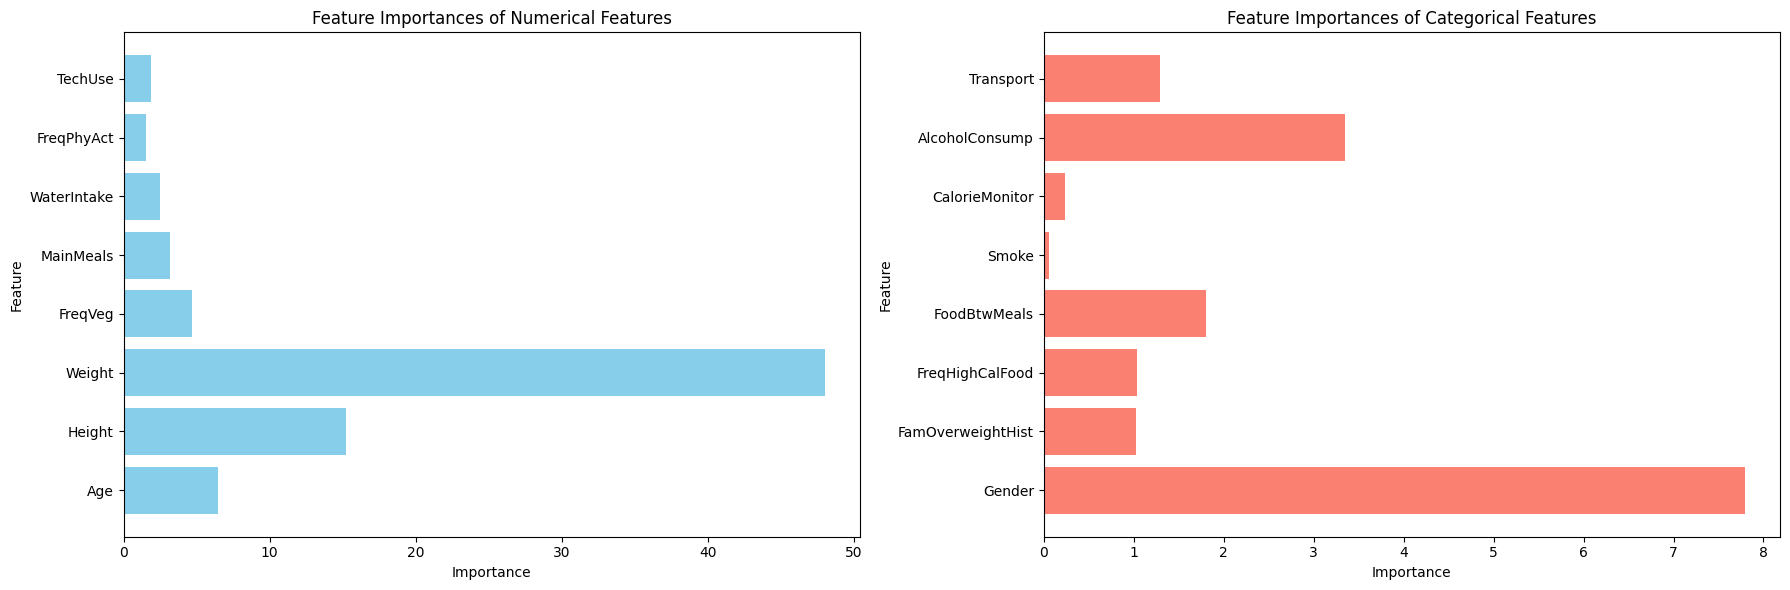

In [26]:
if hasattr(best_model_obj.named_steps['classifier'], 'feature_importances_'):
    feature_importances = best_model_obj.named_steps['classifier'].feature_importances_

    one_hot_encoded_columns = best_model_obj.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)

    aggregated_numerical_importances = {feature: importance for feature, importance in zip(numerical_features, feature_importances[:len(numerical_features)])}

    aggregated_categorical_importances = {}
    for idx, column in enumerate(one_hot_encoded_columns):
        prefix = column.split('_')[0]  
        if prefix not in aggregated_categorical_importances:
            aggregated_categorical_importances[prefix] = 0
        aggregated_categorical_importances[prefix] += feature_importances[len(numerical_features) + idx]  

    # Combining Feature Importance
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Feature Importance for encoded Numerical Features
    axes[0].barh(range(len(aggregated_numerical_importances)), aggregated_numerical_importances.values(), color='skyblue')
    axes[0].set_xlabel('Importance')
    axes[0].set_ylabel('Feature')
    axes[0].set_title('Feature Importances of Numerical Features')
    axes[0].set_yticks(range(len(aggregated_numerical_importances)))
    axes[0].set_yticklabels(aggregated_numerical_importances.keys())

    # Feature Importance for encoded Categorical Features
    axes[1].barh(range(len(aggregated_categorical_importances)), aggregated_categorical_importances.values(), color='salmon')
    axes[1].set_xlabel('Importance')
    axes[1].set_ylabel('Feature')
    axes[1].set_title('Feature Importances of Categorical Features')
    axes[1].set_yticks(range(len(aggregated_categorical_importances)))
    axes[1].set_yticklabels(aggregated_categorical_importances.keys())

    plt.tight_layout()
    plt.show()


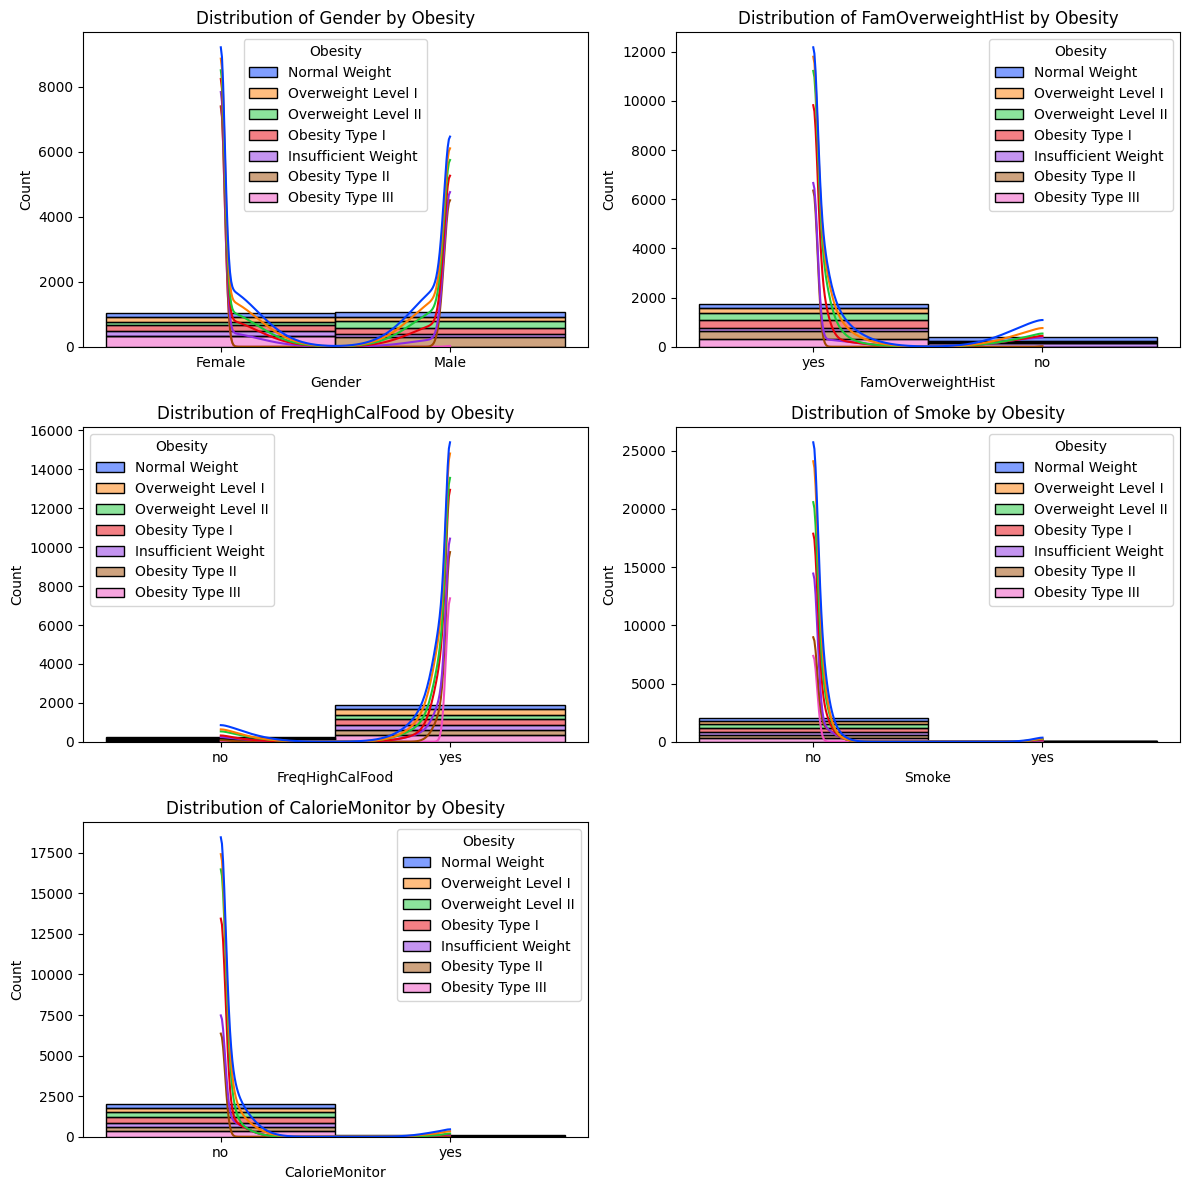

In [27]:
import math

num_features = len(binary_features)
num_cols = 2
num_rows = math.ceil(num_features / num_cols)

plt.figure(figsize=(12, num_rows * 4))  
for i, feature in enumerate(binary_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data=df, x=feature, hue=target_variable, kde=True, palette='bright', multiple="stack")
    plt.title(f'Distribution of {feature} by Obesity')

plt.tight_layout()
plt.show()


` | -------------------------------------------- | END |--------------------------------------------- | `